<h1><b>Mall Customer Segmentation Data Analysis</b></h1>

<h3><b>Content</b></h3>
<ul>
    <a href='#1'><li>Introduction</li></a>
    <a href='#2'><li>Import Library</li></a>
    <a href='#3'><li>Data Exploratory Analysis</li></a>
    <a href='#4'><li>Dimensionality Reduction</li></a>
    <a href='#5'><li>Clustering</li></a>
    <a href='#6'><li>KMeans</li></a>
    <a href='#7'><li>Hierarchical Clustering</li></a>
    <a href='#8'><li>DBSCAN</li></a>

   <a href='#20'><li>References</li></a>
   <a href='#21'><li>Conclusion</li></a>
</ul>

<p>Last Updated: <b>30/06/2019</b></p>
<p><h2>If you like it, please upvote.</h2></p>

<p id='1'><h3><b>Introduction</b></h3></p>

<p>Hello to everyone,<br>
<p>This data set was created for the purpose of learning only the customer segmentation concepts, also known as market basket analysis. A wide variety of analyzes will be created in this section. However, each case will be searched and machine learning algorithms will be used.</p>

<p>Column List</p>
<ul>
    <li>Customer ID</li>    Unique ID assigned to the customer
    <li>Gender</li>         Gender of the customer
    <li>Age</li>            Age of the customer
    <li>Annual Income</li>  Annual Income of the customee
    <li>Spending Score</li> Score assigned by the mall based on customer behavior and spending nature
</ul>



<p id='2'><h3><b>Import Library</b></h3></p>
<p>We need to install a wide variety of libraries. For this we will install <b>pandas, numpy, seaborn and matplotlib</b> libraries.</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<p id='3'><h3><b>Data Exploratory Analysis</b></h3></p>
<p>In the data discovery analysis, we will firstly recognize and analyze our data using a wide variety of functions in the pandas library.</p>

In [2]:
data=pd.read_csv('../input/Mall_Customers.csv')
#read csv for analysis

In [3]:
data.head()
#we'll see the first five lines.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data[['Gender','Age']].head()

,Gender,Age
0,Male,19
1,Male,21
2,Female,20
3,Female,23
4,Female,31


In [5]:
data.tail()
#we'll see the last five lines.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data.sample(5)
#random data 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
96,97,Female,47,60,47
25,26,Male,29,28,82
80,81,Male,57,54,51
185,186,Male,30,99,97
97,98,Female,27,60,50


In [7]:
data.sample(frac=0.1) 
#random data for frac ıt means %

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
36,37,Female,42,34,17
69,70,Female,32,48,47
120,121,Male,27,67,56
197,198,Male,32,126,74
88,89,Female,34,58,60
159,160,Female,30,78,73
91,92,Male,18,59,41
3,4,Female,23,16,77
53,54,Male,59,43,60
155,156,Female,27,78,89


In [8]:
#it is a process that shows the property value in the data set and shows the numbers in the register values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<ul>
    <li>Count : Shows the total number.</li>
    <li>Mean  : Shows the average.</li>
    <li>Std   :  Standard deviation value</li>
    <li>Min   : Minimum value</li>
    <li>%25   : First Quantile</li>
    <li>%50   : Median or Second Quantile</li>
    <li>%75   : Third Quantile</li>
    <li>Max   : Maximum value</li>
</ul>

<p>What is quantile?</p>
<ul>
    <li>1,4,5,6,7,11,12,13,14,15,16,17</li>
    <li>The median is the number that is in middle of the sequence. In this case It would be 11</li>
    <li>The lower quartile is the median in between the smallest number and the median etc in between 1 and 11, which is 6</li>
    <li>The upper quartile you find the median between the median and the largest number etc. betweeb 11 and 17,which will be 14 according to the question above.</li>
</ul>

In [9]:
#It is a function that shows the analysis of numerical values.
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
#It shows the data types in the data set.
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [11]:
data.columns
#show data's columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
#rename data's columns
data.rename(columns={'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore'},inplace=True)

In [13]:
#need to understatand for data's columns
for i,col in enumerate(data.columns):
    print((i+1),'. columns is :',col)

1 . columns is : CustomerID
2 . columns is : Gender
3 . columns is : Age
4 . columns is : AnnualIncome
5 . columns is : SpendingScore


In [14]:
#data row and columns count
data.shape

(200, 5)

In [15]:
#count null values
data.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [16]:
print(list(data.isnull().any()))
#every feature control check null value in this data

[False, False, False, False, False]


In [17]:
#data control null values
data.isnull().values.any()

False

In [18]:
#data type control
data.dtypes

CustomerID        int64
Gender           object
Age               int64
AnnualIncome      int64
SpendingScore     int64
dtype: object

In [19]:
#data correlation
data.corr()

,CustomerID,Age,AnnualIncome,SpendingScore
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
AnnualIncome,0.977548,-0.012398,1.000000,0.009903
SpendingScore,0.013835,-0.327227,0.009903,1.000000


In [20]:
data.iloc[:,1:].corr()

,Age,AnnualIncome,SpendingScore
Age,1.000000,-0.012398,-0.327227
AnnualIncome,-0.012398,1.000000,0.009903
SpendingScore,-0.327227,0.009903,1.000000


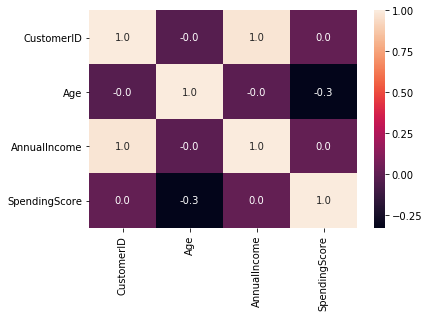

In [21]:
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [22]:
#need to drop customerID
data.drop('CustomerID',axis=1,inplace=True)

In [23]:
#show data gender unique
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [24]:
#show gender value counts
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

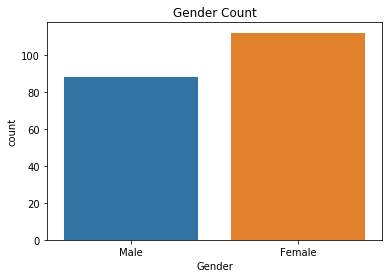

In [25]:
#show graph data gender
sns.countplot(data.Gender)
plt.title('Gender Count')
plt.show()

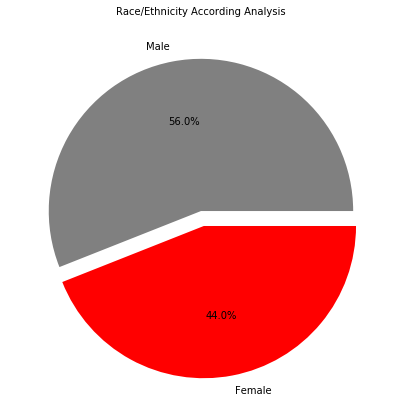

In [26]:
labels=data.Gender.unique()
colors=['gray','red']
explode=[0,0.1]
values=data.Gender.value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Race/Ethnicity According Analysis',color='black',fontsize=10)
plt.show()

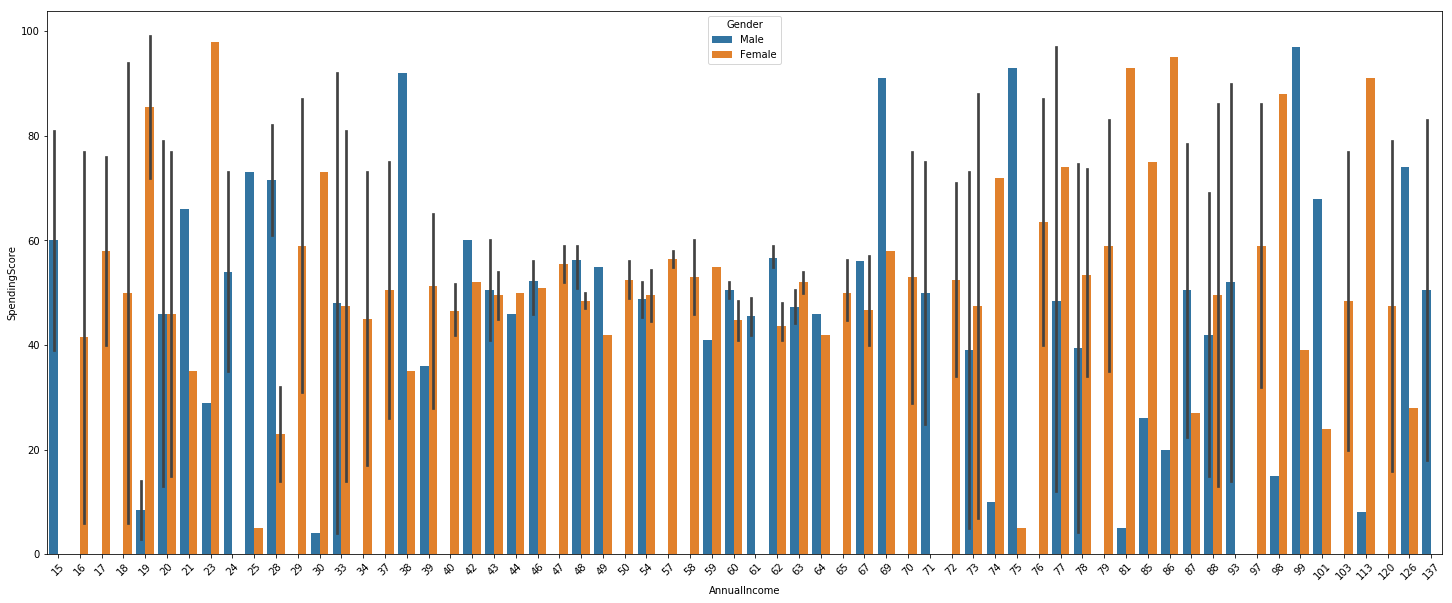

In [27]:
plt.figure(figsize=(25,10))
sns.barplot(x = "AnnualIncome", y = "SpendingScore", hue = "Gender", data = data)
plt.xticks(rotation=45)
plt.show()

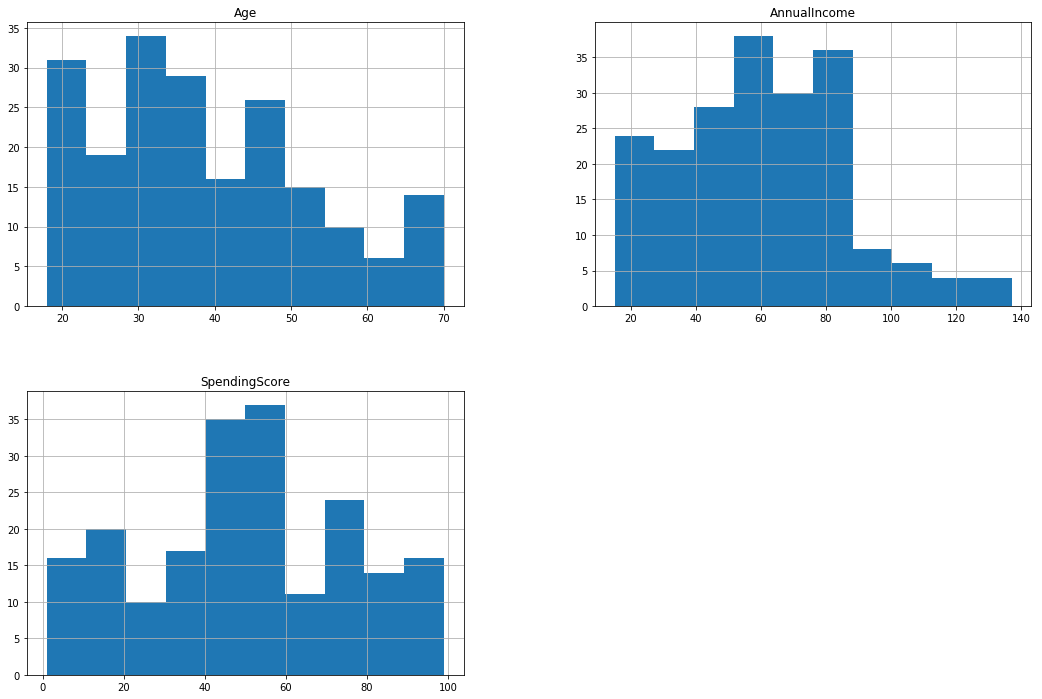

In [28]:
data.hist(figsize=(18,12))
plt.title('All Data Show Histogram System')
plt.show()

In [29]:
#Male Age 
print('Max  :',max(data[data['Gender']=='Male'].Age))
print('Min  :',min(data[data['Gender']=='Male'].Age))
print('Mean :',np.mean(data[data['Gender']=='Male'].Age))
print('Std  :',np.std(data[data['Gender']=='Male'].Age))

Max  : 70
Min  : 18
Mean : 39.80681818181818
Std  : 15.426407372472942


In [30]:
#Female Age
print('Max  :',max(data[data['Gender']=='Female'].Age))
print('Min  :',min(data[data['Gender']=='Female'].Age))
print('Mean :',np.mean(data[data['Gender']=='Female'].Age))
print('Std  :',np.std(data[data['Gender']=='Female'].Age))

Max  : 68
Min  : 18
Mean : 38.098214285714285
Std  : 12.587522039581053


In [31]:
#Male Income 
print('Max  :',max(data[data['Gender']=='Male'].AnnualIncome))
print('Min  :',min(data[data['Gender']=='Male'].AnnualIncome))
print('Mean :',np.mean(data[data['Gender']=='Male'].AnnualIncome))
print('Std  :',np.std(data[data['Gender']=='Male'].AnnualIncome))

Max  : 137
Min  : 15
Mean : 62.22727272727273
Std  : 26.486586344758496


In [32]:
#Female Age
print('Max  :',max(data[data['Gender']=='Female'].AnnualIncome))
print('Min  :',min(data[data['Gender']=='Female'].AnnualIncome))
print('Mean :',np.mean(data[data['Gender']=='Female'].AnnualIncome))
print('Std  :',np.std(data[data['Gender']=='Female'].AnnualIncome))

Max  : 126
Min  : 16
Mean : 59.25
Std  : 25.8955663607278


In [33]:
#Male SpendingScore 
print('Max  :',max(data[data['Gender']=='Male'].SpendingScore))
print('Min  :',min(data[data['Gender']=='Male'].SpendingScore))
print('Mean :',np.mean(data[data['Gender']=='Male'].SpendingScore))
print('Std  :',np.std(data[data['Gender']=='Male'].SpendingScore))

Max  : 97
Min  : 1
Mean : 48.51136363636363
Std  : 27.737812359739767


In [34]:
#Female SpendingScore
print('Max  :',max(data[data['Gender']=='Female'].SpendingScore))
print('Min  :',min(data[data['Gender']=='Female'].SpendingScore))
print('Mean :',np.mean(data[data['Gender']=='Female'].SpendingScore))
print('Std  :',np.std(data[data['Gender']=='Female'].SpendingScore))

Max  : 99
Min  : 5
Mean : 51.526785714285715
Std  : 24.007052468801657


In [35]:
data.Age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [36]:
print(len(data.Age.unique()))

51


In [37]:
data.Age.value_counts()[:10]

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
Name: Age, dtype: int64

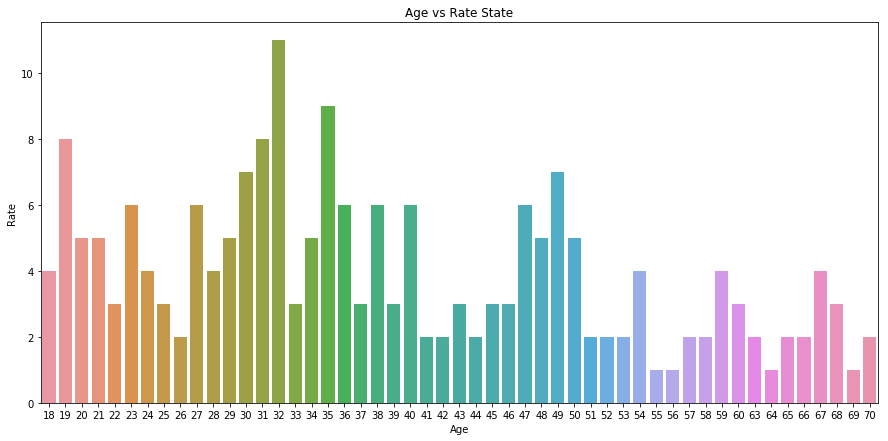

In [38]:
plt.figure(figsize=(15,7))
sns.barplot(x=data.Age.value_counts().index,y=data.Age.value_counts().values)
plt.xlabel('Age')
plt.ylabel('Rate')
plt.title('Age vs Rate State')
plt.show()

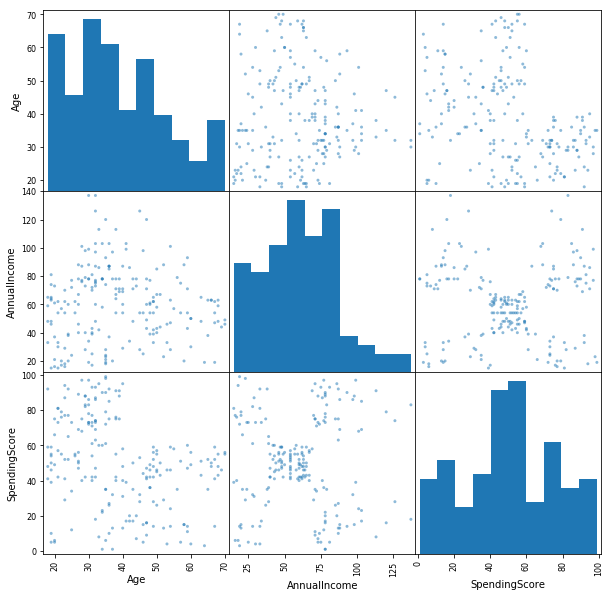

<Figure size 432x288 with 0 Axes>

In [39]:
pd.plotting.scatter_matrix(data,figsize=(10,10))
plt.figure()
plt.show()

In [40]:
age_income=[]
age_unique=data.Age.unique()
for age in age_unique:
    age_income.append(sum(data[data['Age']==age].AnnualIncome))

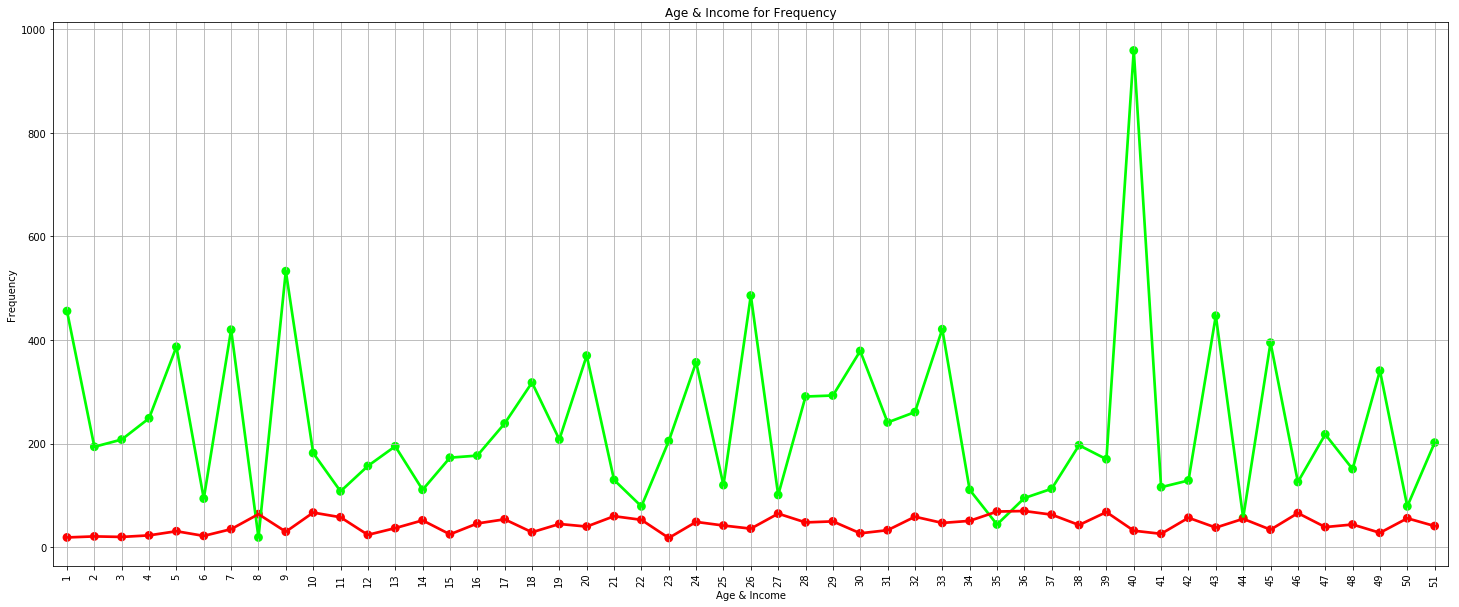

In [41]:
#Age show point plot
f,ax1=plt.subplots(figsize=(25,10))
sns.pointplot(x=np.arange(1,52),y=age_income,color='lime',alpha=0.8,label='Income')
sns.pointplot(x=np.arange(1,52),y=age_unique,color='red',alpha=0.5,label='Age')
plt.xlabel('Age & Income')
plt.ylabel('Frequency')
plt.title('Age & Income for Frequency')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [42]:
age_female_income=[]
age_male_income=[]
for age in age_unique:
    age_male_income.append(sum(data[np.logical_and(data['Gender']=='Male',data['Age']==age)].AnnualIncome))
    age_female_income.append(sum(data[np.logical_and(data['Gender']=='Female',data['Age']==age)].AnnualIncome))

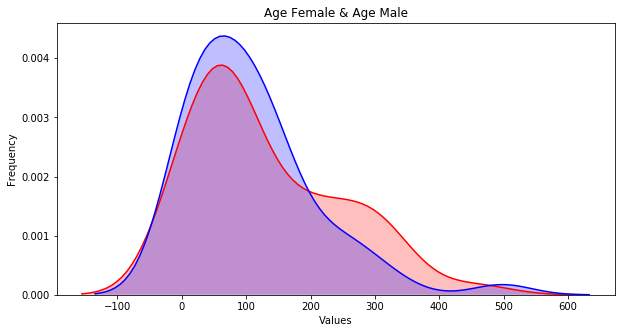

In [43]:
plt.figure(figsize=(10,5))
sns.kdeplot(age_female_income,shade=True,color='r')
sns.kdeplot(age_male_income,shade=True,color='b')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Age Female & Age Male')
plt.show()

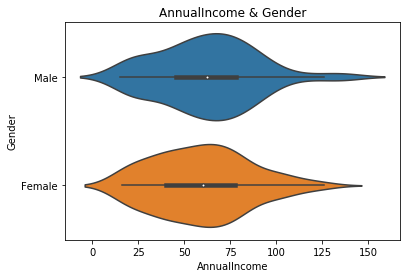

In [44]:
sns.violinplot(x=data['AnnualIncome'],y=data['Gender'])
plt.title('AnnualIncome & Gender')
plt.show()

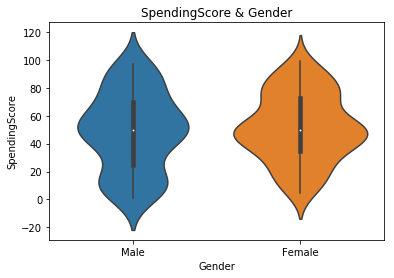

In [45]:
sns.violinplot(y=data['SpendingScore'],x=data['Gender'])
plt.title('SpendingScore & Gender')
plt.show()

In [46]:
age_female_spendingScore=[]
age_male_spendingScore=[]
for age in age_unique:
    age_male_spendingScore.append(sum(data[np.logical_and(data['Gender']=='Male',data['Age']==age)].SpendingScore))
    age_female_spendingScore.append(sum(data[np.logical_and(data['Gender']=='Female',data['Age']==age)].SpendingScore))

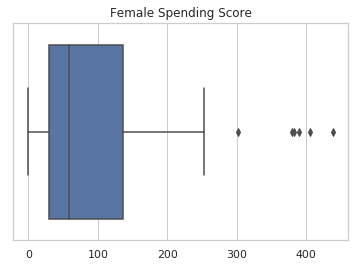

In [47]:
sns.set(style='whitegrid')
sns.boxplot(age_female_spendingScore)
plt.title('Female Spending Score')
plt.show()

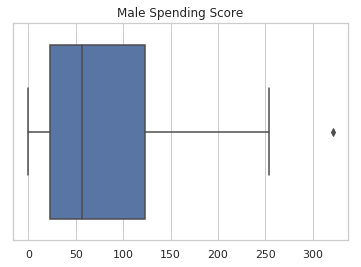

In [48]:
sns.set(style='whitegrid')
sns.boxplot(age_male_spendingScore)
plt.title('Male Spending Score')
plt.show()

In [49]:
data['GenderValue']=[ 0 if gender=='Female' else 1 for gender in data.Gender]

In [50]:
data.dtypes

Gender           object
Age               int64
AnnualIncome      int64
SpendingScore     int64
GenderValue       int64
dtype: object

In [51]:
data['AgesBetween']= pd.cut(data['Age'],5)

In [52]:
data.AgesBetween.unique()

[(17.948, 28.4], (28.4, 38.8], (59.6, 70.0], (49.2, 59.6], (38.8, 49.2]]
Categories (5, interval[float64]): [(17.948, 28.4] < (28.4, 38.8] < (38.8, 49.2] < (49.2, 59.6] < (59.6, 70.0]]

In [53]:
age_between=[]
for age in data.Age:
    if((age>=17.948 and age<28.4)):
        age_between.append(0)
    elif((age>=28.4 and age<38.8)):
        age_between.append(1)
    elif((age>=38.8 and age<49.2)):
        age_between.append(2)
    elif((age>=49.2 and age<59.6)):
        age_between.append(3)
    elif((age>=59.6 and age<=70.0)):
        age_between.append(4)

In [54]:
len(age_between)

200

In [55]:
age_between[:10]

[0, 0, 0, 0, 1, 0, 1, 0, 4, 1]

In [56]:
age_between=pd.DataFrame(data=age_between,index=range(0,200),columns=['AgeValueBetween'])

In [57]:
data.sample(10)

,Gender,Age,AnnualIncome,SpendingScore,GenderValue,AgesBetween
117,Female,49,65,59,0,"(38.8, 49.2]"
180,Female,37,97,32,0,"(28.4, 38.8]"
157,Female,30,78,78,0,"(28.4, 38.8]"
29,Female,23,29,87,0,"(17.948, 28.4]"
74,Male,59,54,47,1,"(49.2, 59.6]"
79,Female,49,54,42,0,"(38.8, 49.2]"
175,Female,30,88,86,0,"(28.4, 38.8]"
75,Male,26,54,54,1,"(17.948, 28.4]"
106,Female,66,63,50,0,"(59.6, 70.0]"
58,Female,27,46,51,0,"(17.948, 28.4]"


In [58]:
data=pd.concat([data,age_between],axis=1)

In [59]:
len(data.columns)

7

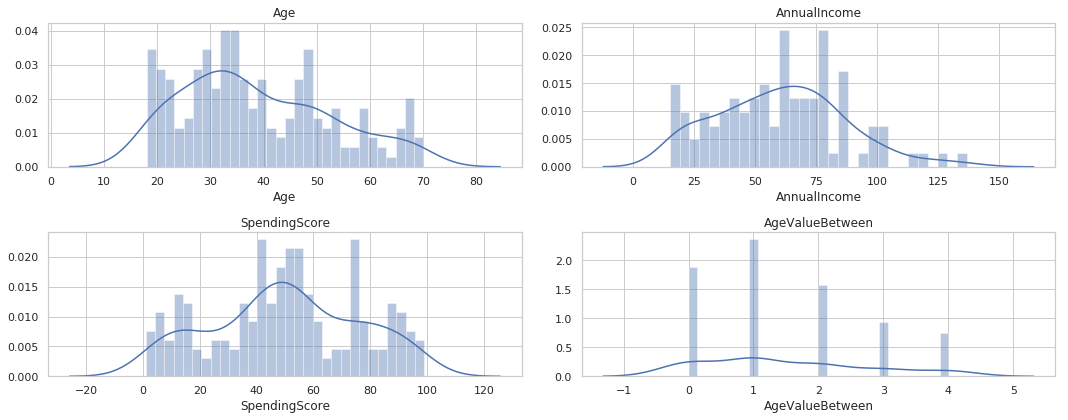

In [60]:
plt.figure(1 , figsize = (15 , 6))
for i,col in enumerate(['Age','AnnualIncome','SpendingScore','AgeValueBetween']):
    i=i+1
    plt.subplot(2 , 2,i)
    plt.title(col)
    sns.distplot(data[col] , bins = 30)
    plt.tight_layout()
plt.show()

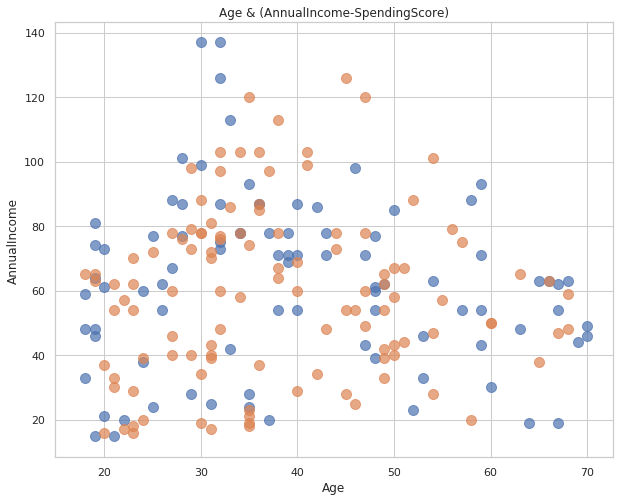

In [61]:
plt.figure(figsize=(10,8))
for gender in data.Gender.unique():
    plt.scatter(x='Age',y='AnnualIncome',data=data[data['Gender']==gender],s=100,alpha=.7)
    plt.xlabel('Age')
    plt.ylabel('AnnualIncome')
    plt.title('Age & (AnnualIncome-SpendingScore)')
plt.show()

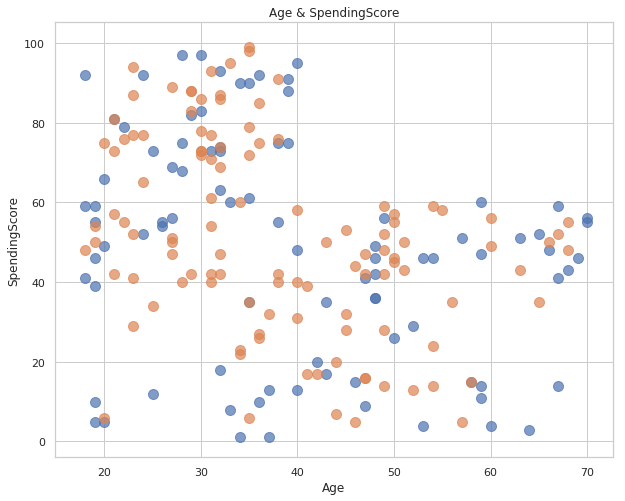

In [62]:
plt.figure(figsize=(10,8))
for gender in data.Gender.unique():
    plt.scatter(x='Age',y='SpendingScore',data=data[data['Gender']==gender],s=100,alpha=.7)
    plt.xlabel('Age')
    plt.ylabel('SpendingScore')
    plt.title('Age & SpendingScore')
plt.show()

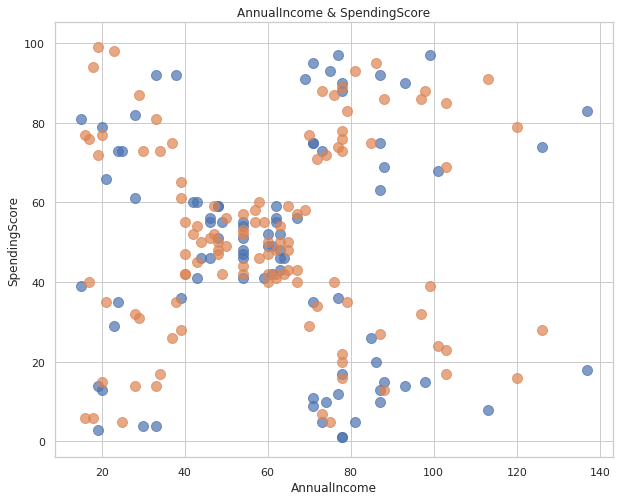

In [63]:
plt.figure(figsize=(10,8))
for gender in data.Gender.unique():
    plt.scatter(x='AnnualIncome',y='SpendingScore',data=data[data['Gender']==gender],s=100,alpha=.7)
    plt.xlabel('AnnualIncome')
    plt.ylabel('SpendingScore')
    plt.title('AnnualIncome & SpendingScore')
plt.show()

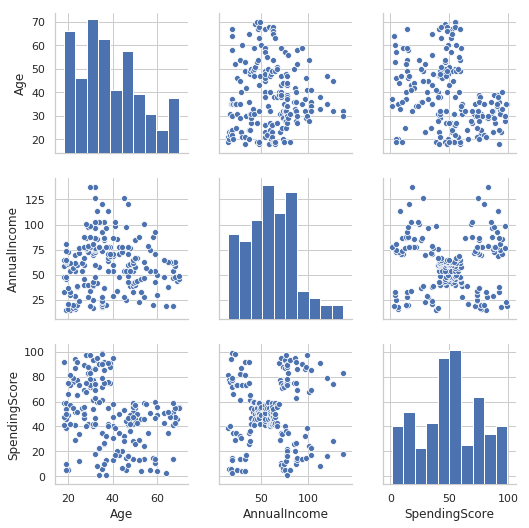

In [64]:
sns.pairplot(data[['Age','AnnualIncome','SpendingScore']])
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


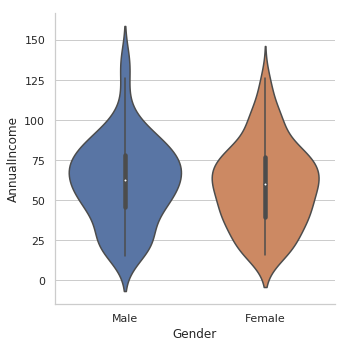

In [65]:
sns.factorplot(x="Gender", y="AnnualIncome", kind='violin',data=data)
plt.show()

In [66]:
data.head()

,Gender,Age,AnnualIncome,SpendingScore,GenderValue,AgesBetween,AgeValueBetween
0,Male,19,15,39,1,"(17.948, 28.4]",0
1,Male,21,15,81,1,"(17.948, 28.4]",0
2,Female,20,16,6,0,"(17.948, 28.4]",0
3,Female,23,16,77,0,"(17.948, 28.4]",0
4,Female,31,17,40,0,"(28.4, 38.8]",1


In [67]:
data.Age.value_counts()[:3]

32    11
35     9
19     8
Name: Age, dtype: int64

In [68]:
AnnualIncome_32=0
AnnualIncome_35=0
AnnualIncome_19=0

AnnualIncome_32=sum(data[data['Age']==32].AnnualIncome)
AnnualIncome_35=sum(data[data['Age']==35].AnnualIncome)
AnnualIncome_19=sum(data[data['Age']==19].AnnualIncome)

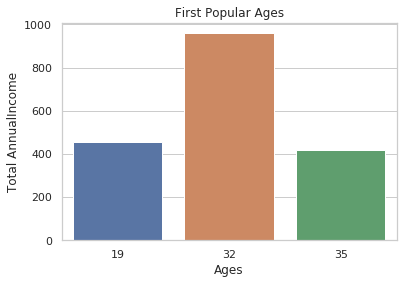

In [69]:
plt.title('First Popular Ages')
sns.barplot(x=['19','35','32'],y=[AnnualIncome_19,AnnualIncome_35,AnnualIncome_32])
plt.xlabel('Ages')
plt.ylabel('Total AnnualIncome')
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


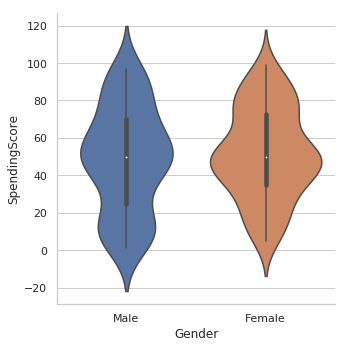

In [70]:
sns.factorplot(x="Gender", y="SpendingScore", kind='violin',data=data)
plt.show()

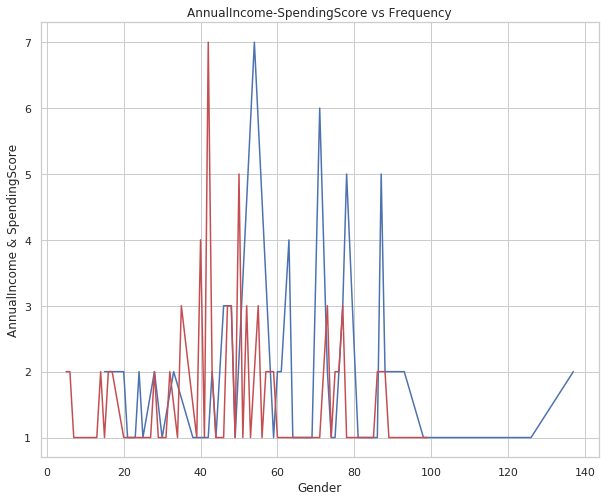

In [71]:
plt.figure(figsize=(10,8))
data[data['Gender']=='Male']['AnnualIncome'].value_counts().sort_index().plot.line(color='b')
data[data['Gender']=='Female']['SpendingScore'].value_counts().sort_index().plot.line(color='r')
plt.xlabel('Gender')
plt.ylabel('AnnualIncome & SpendingScore')
plt.title('AnnualIncome-SpendingScore vs Frequency')
plt.show()

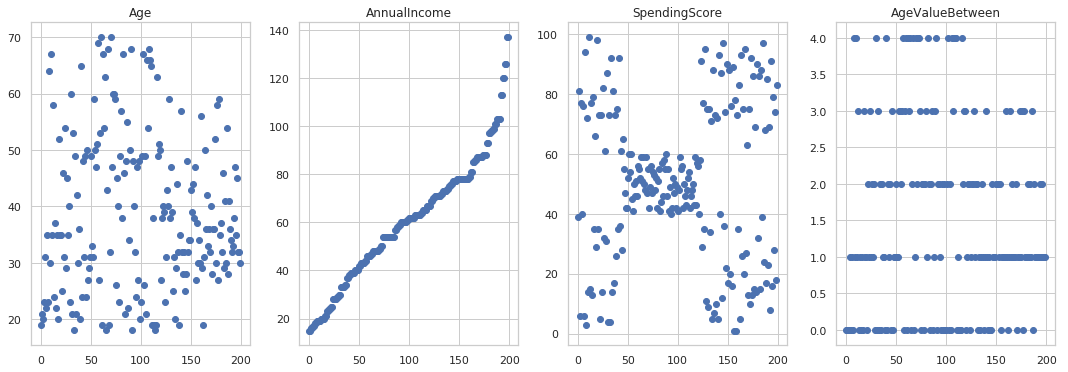

In [72]:
for i,col in enumerate(['Age', 'AnnualIncome', 'SpendingScore','AgeValueBetween']):
    plt.subplot(2,4,i+1)
    plt.scatter([i for i in range(200)],data[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(15,10)
    plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

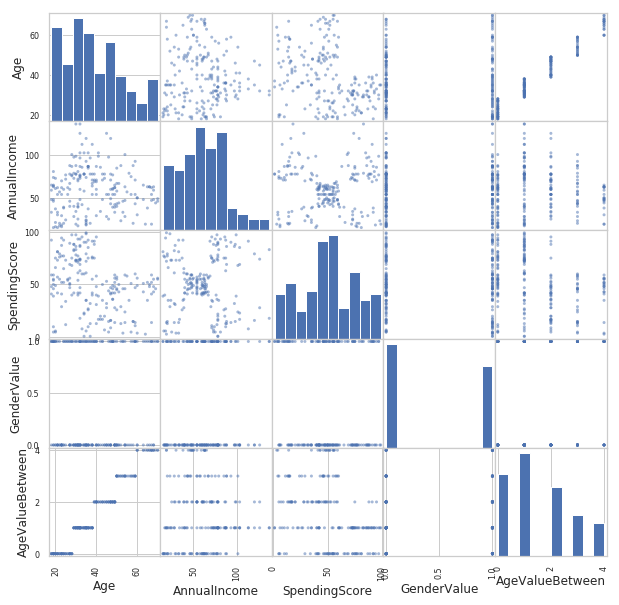

<Figure size 432x288 with 0 Axes>

In [73]:
pd.plotting.scatter_matrix(data,figsize=(10,10))
plt.figure()

In [74]:
data.columns

Index(['Gender', 'Age', 'AnnualIncome', 'SpendingScore', 'GenderValue',
       'AgesBetween', 'AgeValueBetween'],
      dtype='object')

<p>Good, they are gone now. To implement dimensionality reduction with PCA, I must scale the data.

For this purpose, I will apply logarithmic scaling on the data.

Additionally, I will delete some of the data points as they are stated as outliers in my assignment paper.</p>

In [75]:
data.drop(['Gender','AgesBetween'],axis=1,inplace=True)
data.drop(['GenderValue','AgeValueBetween'],axis=1,inplace=True)

In [76]:
data.head()

,Age,AnnualIncome,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [77]:
log_data=np.log(data)
good_data=log_data.drop([128,65,66,75,154])
good_data[:10]

,Age,AnnualIncome,SpendingScore
0,2.944439,2.708050,3.663562
1,3.044522,2.708050,4.394449
2,2.995732,2.772589,1.791759
3,3.135494,2.772589,4.343805
4,3.433987,2.833213,3.688879
5,3.091042,2.833213,4.330733
6,3.555348,2.890372,1.791759
7,3.135494,2.890372,4.543295
8,4.158883,2.944439,1.098612
9,3.401197,2.944439,4.276666


<p id='4'><h3><b>Dimensionality Reduction</b></h3></p>
Now it is time to implement PCA to the data set.

But, before that, I will investigate the explained variance ratio and resulting principal components:

In [78]:
from sklearn.decomposition import PCA
pca=PCA().fit(good_data)
print(pca.explained_variance_ratio_)
print()
print(good_data.columns.values.tolist())
print(pca.components_)

[0.64428499 0.24212251 0.1135925 ]

['Age', 'AnnualIncome', 'SpendingScore']
[[ 0.10863793 -0.01664262 -0.99394206]
 [-0.1267312  -0.99193326  0.00275725]
 [-0.98597008  0.12566393 -0.10987071]]


<p>First two components seem to cover around 86% of the data.</p>
<p>To see the variance in a cumulative manner, I will plot a step graph like below:</p>

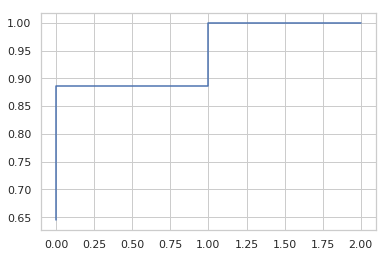

In [79]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

<p>This plot too shows that 70% of the data can be expressed by the first two principal components.</p>

<p>So, I will apply PCA to the data with number of components = 2.</p>

<p>The reduced data can be seen on the plotting below.</p>

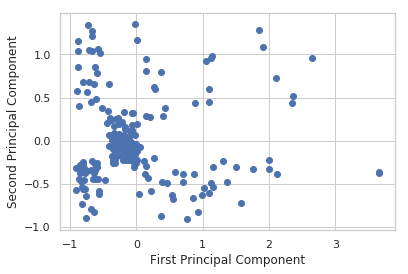

In [80]:
pca=PCA(n_components=2)
pca.fit(good_data)
reduced_data=pca.transform(good_data)
inverse_data=pca.inverse_transform(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

<p>According to the principal components, data points with greater values on the x-axis represent the customers that are less likely to spend to Detergents_Paper category.</p>

<p>Likewise, data points with greater values on the y-axis</p>

<p>Now, I can constitute a DataFrame out of my reduced data with two dimensions:</p>

In [81]:
reduced_data=pd.DataFrame(reduced_data,columns=['Dim1','Dim2'])
reduced_data[:10]

,Dim1,Dim2
0,-0.019579,1.353317
1,-0.735166,1.342648
2,1.845382,1.277637
3,-0.676020,1.266962
4,0.006357,1.167192
5,-0.668866,1.212424
6,1.904217,1.089884
7,-0.876261,1.150679
8,2.657832,0.957855
9,-0.583282,1.062640


<p id='5'><h3><b>Clustering</b></h3></p>
<p>It is time to cluster the data so that we can extract information from them related to the customer annual spending behaviors.</p>

<p id='6'><h3><b>K-Means</b></h3></p>
<p>I will run K-Means starting from k=2 to k=10.

I will collect the silhouette scores for each of the results. So that I can determine the best number of clusters.</p>

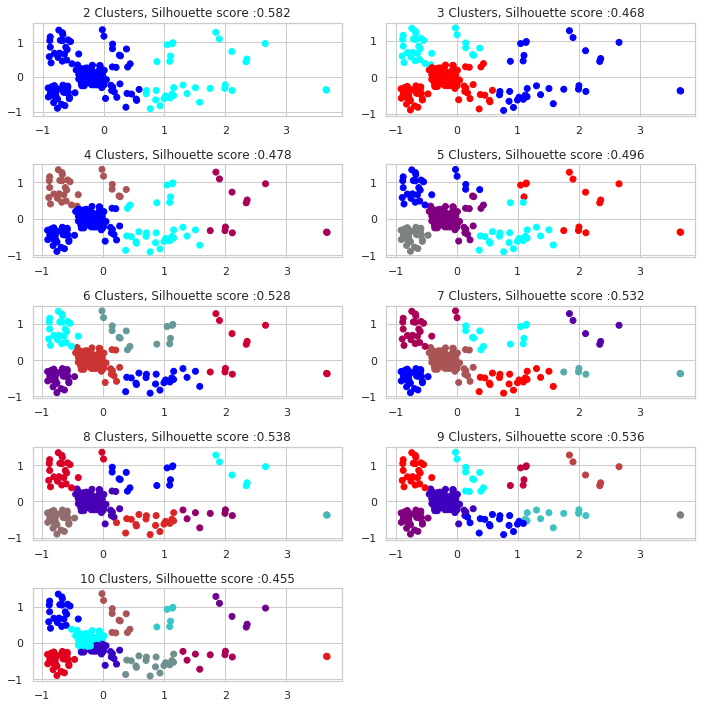

In [82]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.colors import LinearSegmentedColormap

cmap=LinearSegmentedColormap.from_list('BlRd',['blue','red','cyan'])

silhouette_scores=[]
for i in range(2,11):
    cl=KMeans(n_clusters=i,random_state=0)
    result=cl.fit_predict(reduced_data)
    silhouette=silhouette_score(reduced_data,result)
    silhouette_scores.append(silhouette)
    plt.subplot(5,2,i-1)
    plt.scatter(reduced_data.Dim1.values,reduced_data.Dim2.values,c=result,cmap=cmap)
    plt.title(str(i)+' Clusters, Silhouette score :'+ str(silhouette)[:5])
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

<p>So colorful. Now I will plot a graph for the collected silhouette scores:</p>

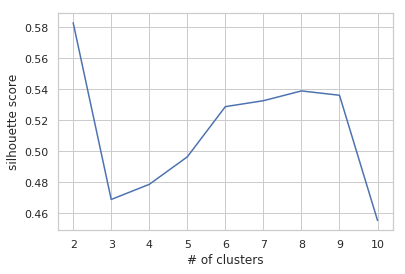

In [83]:
plt.plot([i for i in range(2,11)],silhouette_scores)
plt.xlabel('# of clusters')
plt.ylabel('silhouette score')
plt.show()

<p>The best number of clusters seem to be 6 (or maybe 9) or 2 in this case. So, I will save the corresponding plot for the later usage:</p>

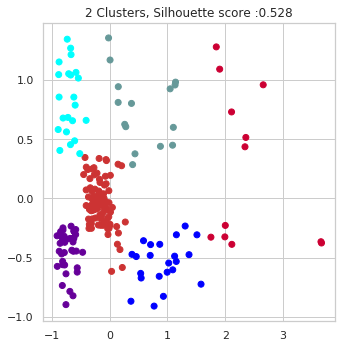

In [84]:
cl=KMeans(n_clusters=6,random_state=0)
result=cl.fit_predict(reduced_data)
silhouette=silhouette_score(reduced_data,result)
plt.scatter(reduced_data.Dim1.values,reduced_data.Dim2.values,c=result,cmap=cmap)
plt.title(str(2)+' Clusters, Silhouette score :'+str(silhouette)[:5])
fig,ax=plt.gcf(),plt.gca()
fig.set_size_inches(5,5)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


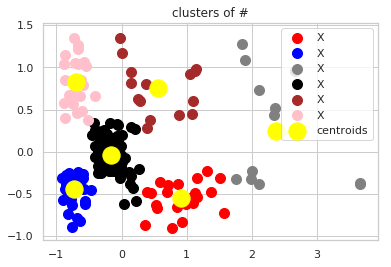

In [85]:
kmeans=KMeans(n_clusters=6,init='k-means++',max_iter=300,random_state=0)
y_kmeans=kmeans.fit_predict(reduced_data)

reduced_data_X=reduced_data.as_matrix(columns=None)

plt.scatter(reduced_data_X[y_kmeans==0,0],reduced_data_X[y_kmeans==0,1],s=100,c='red',label='X')
plt.scatter(reduced_data_X[y_kmeans==1,0],reduced_data_X[y_kmeans==1,1],s=100,c='blue',label='X')
plt.scatter(reduced_data_X[y_kmeans==2,0],reduced_data_X[y_kmeans==2,1],s=100,c='gray',label='X')
plt.scatter(reduced_data_X[y_kmeans==3,0],reduced_data_X[y_kmeans==3,1],s=100,c='black',label='X')
plt.scatter(reduced_data_X[y_kmeans==4,0],reduced_data_X[y_kmeans==4,1],s=100,c='brown',label='X')
plt.scatter(reduced_data_X[y_kmeans==5,0],reduced_data_X[y_kmeans==5,1],s=100,c='pink',label='X')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.title('clusters of #')
plt.legend()
plt.show()



<p id='7'><h3><b>Hierarchical Clustering</b></h3></p>
<p>Here are the results of running hierarchical clustering on the data set. I will try all linkage methods possible to see the differences. Then I will plot dendrograms and clusters side by side.</p>

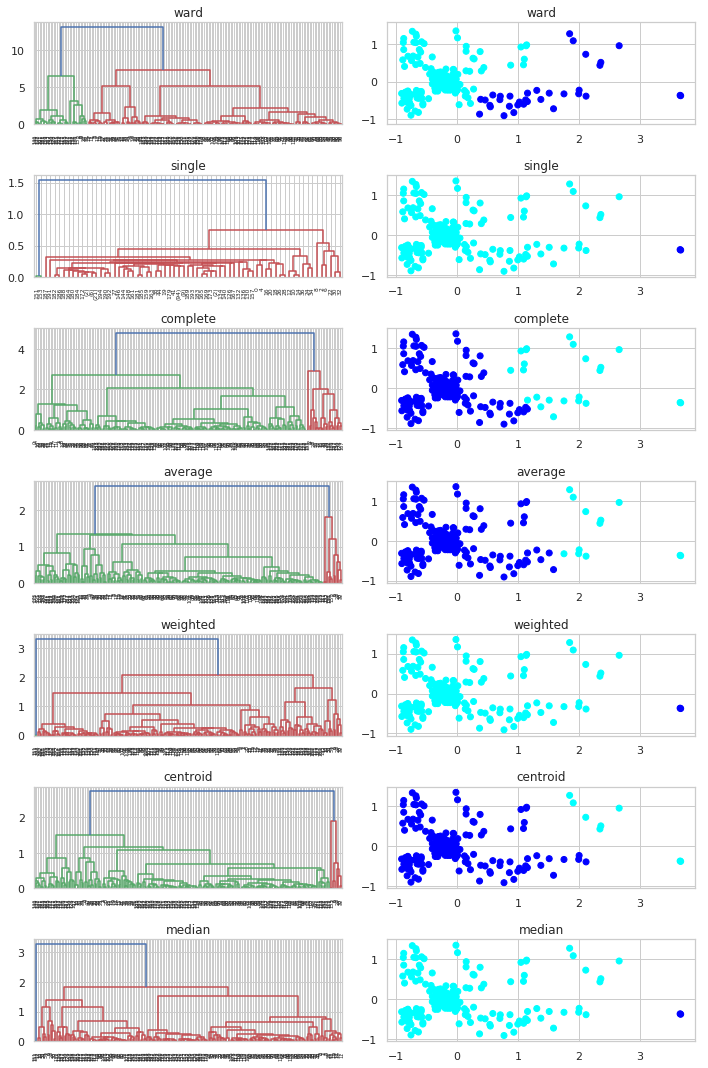

In [86]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

methods=['ward','single','complete','average','weighted','centroid','median']

plot_id=0
for method in methods:
    cl=linkage(reduced_data,method=method)
    
    for sw in ['dendrogram','clusters']:
        if sw=='dendrogram':
            plot_id+=1
            plt.subplot(7,2,plot_id)
            plt.title(method)
            fig,ax=plt.gcf(),plt.gca()
            dn=dendrogram(cl,truncate_mode='level',p=15)
            plt.tight_layout()
            fig.set_size_inches(10,15)
        else:
            plot_id+=1
            labels=fcluster(cl,2,criterion='maxclust')
            plt.subplot(7,2,plot_id)
            plt.title(method)
            plt.scatter(reduced_data.Dim1.values.tolist(),
                       reduced_data.Dim2.values.tolist(),
                       cmap=cmap,
                       c=labels)
plt.show()            

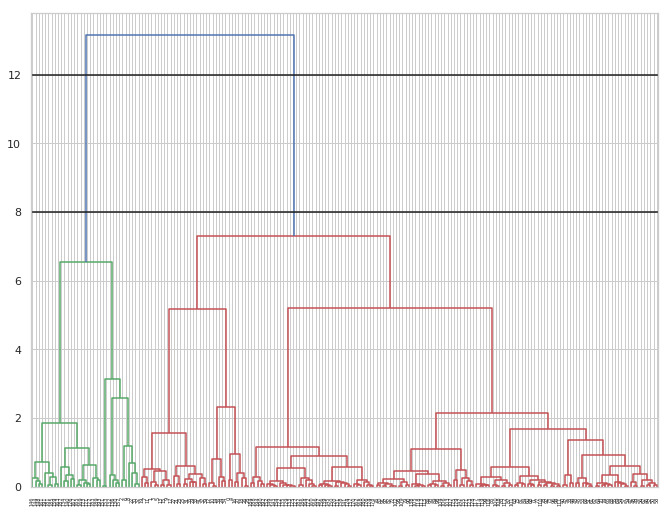

In [87]:
cl=linkage(reduced_data,method='ward')
fig,ax=plt.gcf(),plt.gca()
dn=dendrogram(cl,truncate_mode='level',p=15)
plt.tight_layout()
fig.set_size_inches(10,8)
plt.axhline(y=8,c='k')
plt.axhline(y=12,c='k')
plt.show()

<p>This maximum of 20 seems to be a good distance for clustering. Doing so, we should have 6 clusters. I am saving the plot:</p>

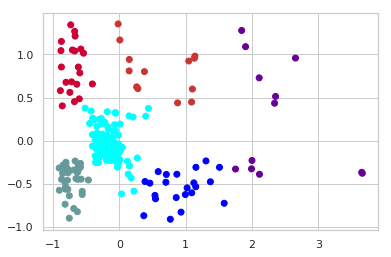

In [88]:
cl=linkage(reduced_data,method='ward')
labels=fcluster(cl,6,criterion='maxclust')
plt.scatter(reduced_data.Dim1.values.tolist(),
           reduced_data.Dim2.values.tolist(),
           cmap=cmap,
           c=labels)
plt.show()
#plt.savefig('img/hierarchical_fav.png')

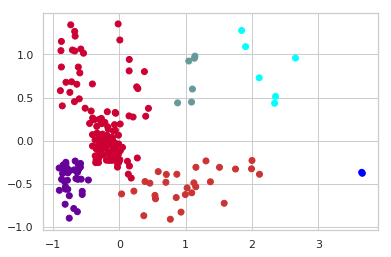

In [89]:
cl=linkage(reduced_data,method='weighted')
labels=fcluster(cl,6,criterion='maxclust')
plt.scatter(reduced_data.Dim1.values.tolist(),
           reduced_data.Dim2.values.tolist(),
           cmap=cmap,
           c=labels)
plt.show()

<p id='8'><h3><b>DBSCAN</b></h3></p>
<p>Here is the toughest one. I will run this algorithm for epsilons 0.3 through 0.9 with step size of 0.2 and for minimum number of samples 3 through 8 with one increment per step.</p>

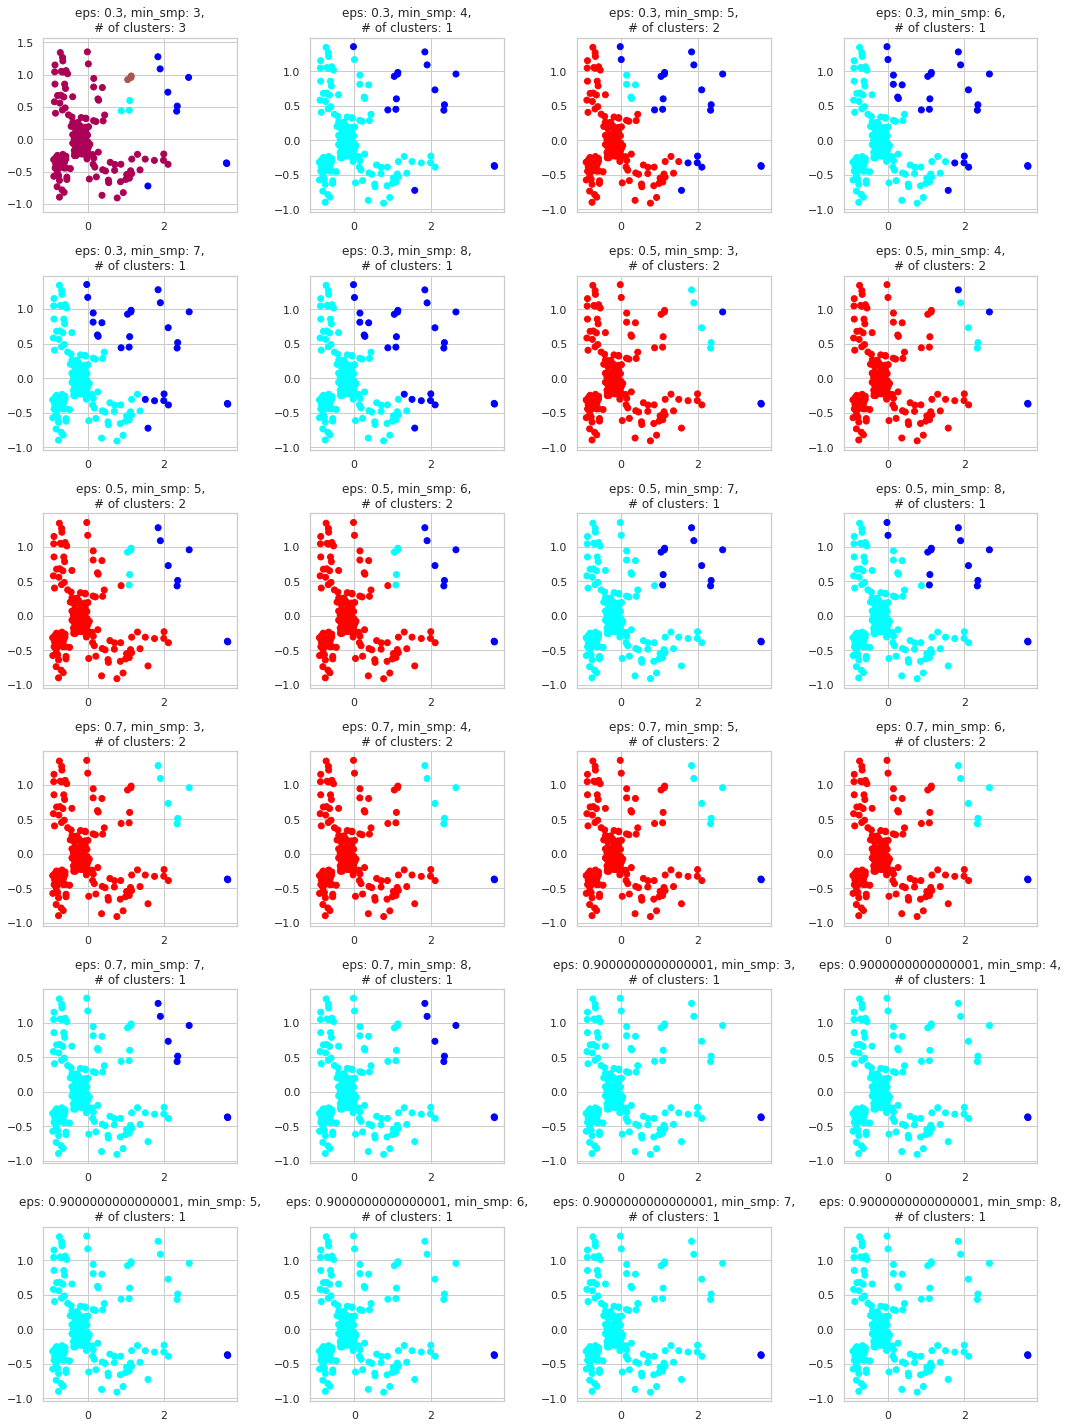

In [90]:
from sklearn.cluster import DBSCAN

plot_id=0
for eps in np.arange(0.3,0.9,0.2):
    for min_samples in range(3,9):
        plot_id+=1
        cl=DBSCAN(eps=eps,min_samples=min_samples)
        result=cl.fit_predict(reduced_data)
        n_clusters=len([c for c in list(set(result)) if c!=-1])
        plt.subplot(6,4,plot_id)
        plt.scatter(reduced_data.Dim1.values.tolist(),
                   reduced_data.Dim2.values.tolist(),
                   cmap=cmap,
                   c=result)
        fig,ax=plt.gcf(),plt.gca()
        fig.set_size_inches(15,20)
        plt.title('eps: ' + str(eps)+', min_smp: ' + str(min_samples)+',\n# of clusters: ' + str(n_clusters))
        plt.tight_layout()
plt.show()

<p>None of them resembles the previous results with other algorithms to me.

I think the last one, with one big group at the center may be useful since it groups customers that are like spending together and leaves the ones as outliers.</p>

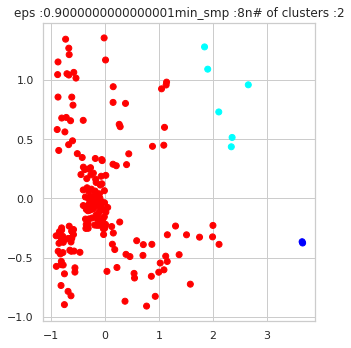

In [91]:
cl=DBSCAN(eps=0.7,min_samples=5)
result=cl.fit_predict(reduced_data)
n_clusters=len([c for c in list(set(result)) if c!=-1])
plt.scatter(reduced_data.Dim1.values.tolist(),
           reduced_data.Dim2.values.tolist(),
           cmap=cmap,
           c=result)
fig,ax=plt.gcf(),plt.gca()
fig.set_size_inches(5,5)
plt.title('eps :'+str(eps)+'min_smp :'+str(min_samples)+'n# of clusters :'+str(n_clusters))
plt.tight_layout()
#plt.savefig('img/dbscan_fav.png')
plt.show()

<p id='20'><h3><b>References</b></h3></p>
<p>https://www.kaggle.com/spscientist/students-performance-in-exams</p>
<p>https://seaborn.pydata.org/</p>
<p>https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners</p>
<p>https://www.kaggle.com/biphili/seaborn-plot-to-visualize-iris-data</p>

<p id='21'><h3><b>Conclusion</b></h3></p>
<p>As a result, we have explained the seaborn library in a very detailed way and created a wide variety of graphs. If you like it, I expect your support. If you like <b>UPVOTED</b> I would be very happy if you do. If you have any questions, I am ready to answer your questions. At the bottom there are the kernel values that I have already done.</p>
<p>https://www.kaggle.com/kralmachine/analyzing-the-heart-disease</p>
<p>https://www.kaggle.com/kralmachine/data-visualization-of-suicide-rates</p>
<p>https://www.kaggle.com/kralmachine/gradient-admission-eda-ml-0-92</p>
<p>https://www.kaggle.com/kralmachine/football-results-from-1872-to-2018-datavisulation</p>
<p>https://www.kaggle.com/kralmachine/pandas-tutorial-for-beginner</p>
<p>https://www.kaggle.com/kralmachine/visual-analysis-of-world-happiness-in-2015</p>

<p>Now that we have applied three clustering algorithms on the problem, we then interpret the resulting clusters. So that, the wholesale distributor may take necessary actions for each types of customers.</p>